In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('ToyotaCorolla.csv')

In [4]:

print("Dataset columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)

Dataset columns:
['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

First 5 rows:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Dataset shape: (1436, 11)


In [5]:

print("Basic info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSummary statistics:")
print(df.describe())

numerical_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumerical columns:", numerical_cols.tolist())

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

Missing values:
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

Summary statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  14

In [6]:
# Block 4: Check for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n{col} value counts:")
        print(df[col].value_counts())

Categorical columns: ['Fuel_Type']

Fuel_Type value counts:
Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

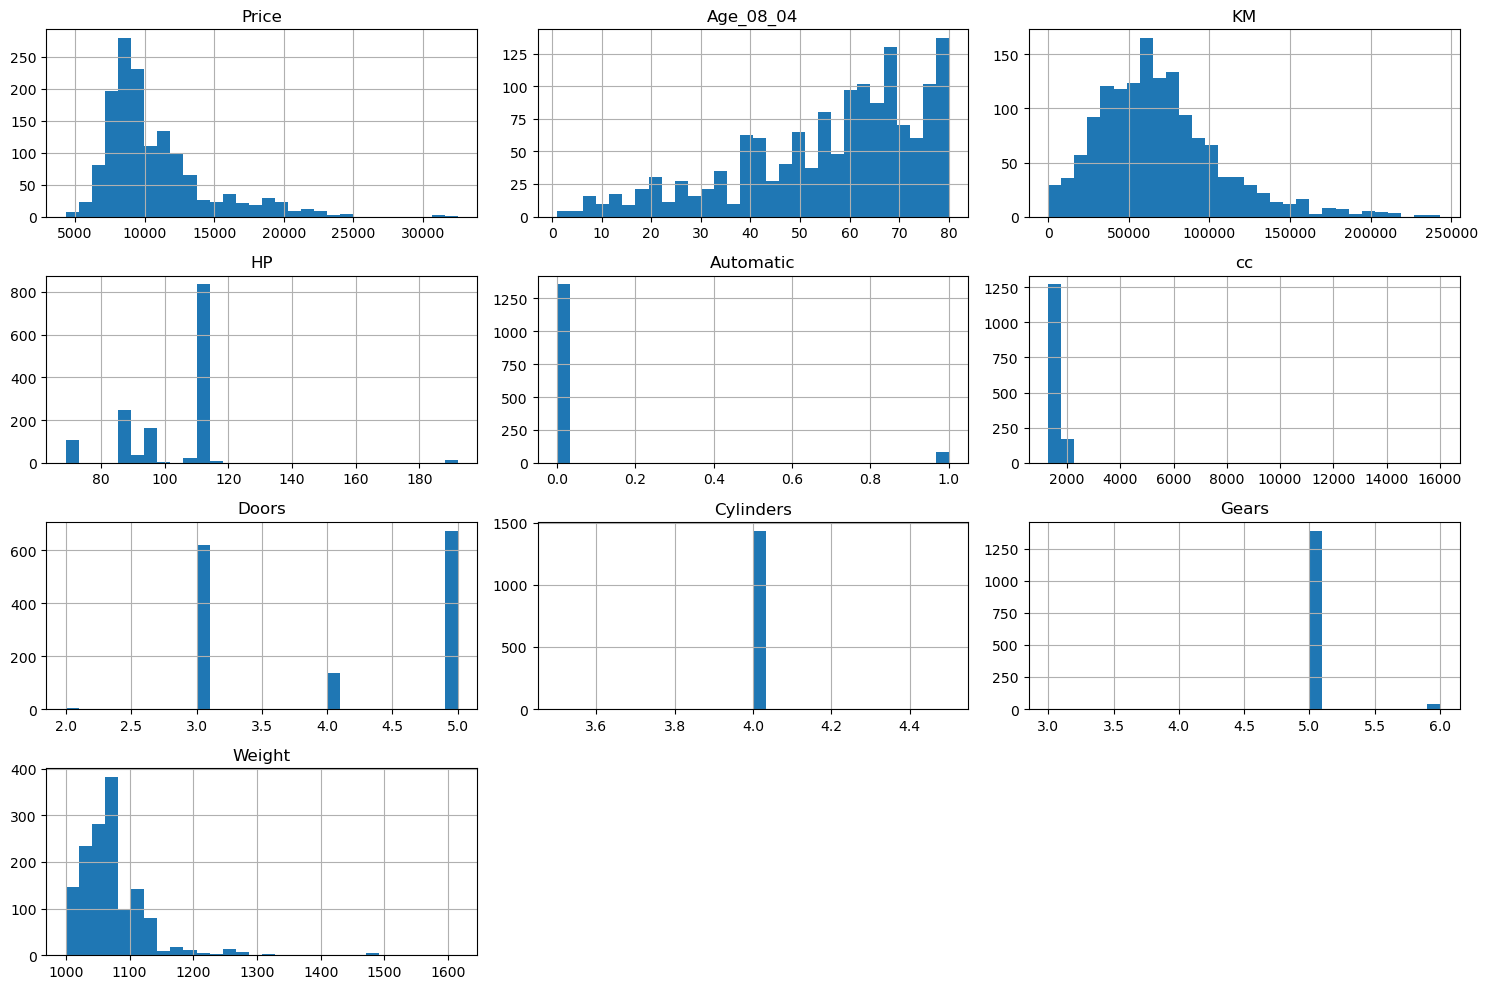

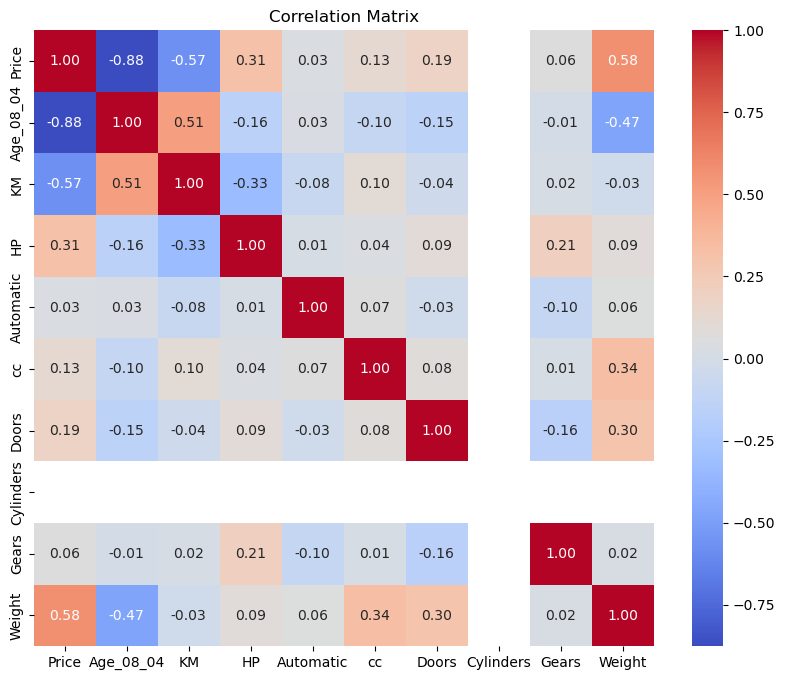

In [7]:

plt.figure(figsize=(10, 6))
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
else:
    df_encoded = df.copy()

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (1148, 11)
Testing set: (288, 11)


In [9]:
#Model 1 - Multiple Linear Regression
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)

r2_1 = r2_score(y_test, y_pred1)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae1 = mean_absolute_error(y_test, y_pred1)

print("MODEL 1: MULTIPLE LINEAR REGRESSION")
print(f"R² Score: {r2_1:.4f}")
print(f"RMSE: {rmse1:.2f}")
print(f"MAE: {mae1:.2f}")

coefficients1 = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 5 coefficients:")
print(coefficients1.head())

MODEL 1: MULTIPLE LINEAR REGRESSION
R² Score: 0.8349
RMSE: 1484.27
MAE: 990.89

Top 5 coefficients:
             Feature  Coefficient
0          Age_08_04 -2267.294783
8             Weight  1316.818311
1                 KM  -611.654412
10  Fuel_Type_Petrol   458.047731
2                 HP   208.349858


In [10]:
#Model 2 - Manual feature selection
high_corr_with_price = df_encoded.corr()['Price'].sort_values(key=abs, ascending=False)
high_corr_features = high_corr_with_price[1:6].index.tolist()

X_train_manual = X_train[high_corr_features]
X_test_manual = X_test[high_corr_features]

scaler_manual = StandardScaler()
X_train_manual_scaled = scaler_manual.fit_transform(X_train_manual)
X_test_manual_scaled = scaler_manual.transform(X_test_manual)

model2 = LinearRegression()
model2.fit(X_train_manual_scaled, y_train)
y_pred2 = model2.predict(X_test_manual_scaled)

r2_2 = r2_score(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae2 = mean_absolute_error(y_test, y_pred2)

print("MODEL 2: MANUAL FEATURE SELECTION")
print(f"Selected features: {high_corr_features}")
print(f"R² Score: {r2_2:.4f}")
print(f"RMSE: {rmse2:.2f}")
print(f"MAE: {mae2:.2f}")

coefficients2 = pd.DataFrame({
    'Feature': high_corr_features,
    'Coefficient': model2.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nCoefficients:")
print(coefficients2)

MODEL 2: MANUAL FEATURE SELECTION
Selected features: ['Age_08_04', 'Weight', 'KM', 'HP', 'Doors']
R² Score: 0.8508
RMSE: 1410.92
MAE: 998.93

Coefficients:
     Feature  Coefficient
0  Age_08_04 -2251.907320
1     Weight  1011.356029
2         KM  -762.776861
3         HP   432.197886
4      Doors   -20.040667


In [11]:
#Model 3 - Remove some features
features_to_keep = [col for col in X.columns if 'FuelType' not in col and 'Automatic' not in col]
X_train_reduced = X_train[features_to_keep]
X_test_reduced = X_test[features_to_keep]

scaler_reduced = StandardScaler()
X_train_reduced_scaled = scaler_reduced.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler_reduced.transform(X_test_reduced)

model3 = LinearRegression()
model3.fit(X_train_reduced_scaled, y_train)
y_pred3 = model3.predict(X_test_reduced_scaled)

r2_3 = r2_score(y_test, y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
mae3 = mean_absolute_error(y_test, y_pred3)

print("MODEL 3: REDUCED FEATURES")
print(f"R² Score: {r2_3:.4f}")
print(f"RMSE: {rmse3:.2f}")
print(f"MAE: {mae3:.2f}")

coefficients3 = pd.DataFrame({
    'Feature': features_to_keep,
    'Coefficient': model3.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 5 coefficients:")
print(coefficients3.head())

MODEL 3: REDUCED FEATURES
R² Score: 0.8337
RMSE: 1489.47
MAE: 991.55

Top 5 coefficients:
            Feature  Coefficient
0         Age_08_04 -2260.335975
7            Weight  1333.552388
1                KM  -613.624800
9  Fuel_Type_Petrol   460.863370
2                HP   199.737113


In [12]:
# Ridge Regression
alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = None
best_score = -np.inf

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    score = ridge.score(X_test_scaled, y_test)
    if score > best_score:
        best_score = score
        best_alpha = alpha

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("RIDGE REGRESSION")
print(f"Best alpha: {best_alpha}")
print(f"R² Score: {r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")

coefficients_ridge = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 5 coefficients:")
print(coefficients_ridge.head())

RIDGE REGRESSION
Best alpha: 100
R² Score: 0.8417
RMSE: 1453.43
MAE: 993.74

Top 5 coefficients:
             Feature  Coefficient
0          Age_08_04 -2070.198371
8             Weight  1153.251521
1                 KM  -719.773798
2                 HP   286.765510
10  Fuel_Type_Petrol   236.631820


In [13]:
# Block 11: Lasso Regression
best_alpha_lasso = None
best_score_lasso = -np.inf

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    score = lasso.score(X_test_scaled, y_test)
    if score > best_score_lasso:
        best_score_lasso = score
        best_alpha_lasso = alpha

lasso_model = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("LASSO REGRESSION")
print(f"Best alpha: {best_alpha_lasso}")
print(f"R² Score: {r2_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"MAE: {mae_lasso:.2f}")

coefficients_lasso = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})
selected_features = coefficients_lasso[coefficients_lasso['Coefficient'] != 0]
print(f"\nFeatures selected: {len(selected_features)} out of {len(X.columns)}")
print("Selected coefficients:")
print(selected_features.sort_values('Coefficient', key=abs, ascending=False))

LASSO REGRESSION
Best alpha: 100
R² Score: 0.8470
RMSE: 1428.69
MAE: 993.45

Features selected: 6 out of 11
Selected coefficients:
             Feature  Coefficient
0          Age_08_04 -2243.152110
8             Weight  1008.878685
1                 KM  -646.292165
2                 HP   294.336761
10  Fuel_Type_Petrol   150.230602
7              Gears    23.392891


In [14]:
# Block 12: Model comparison
models_comparison = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Manual Feature Selection', 
              'Reduced Features', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [r2_1, r2_2, r2_3, r2_ridge, r2_lasso],
    'RMSE': [rmse1, rmse2, rmse3, rmse_ridge, rmse_lasso],
    'MAE': [mae1, mae2, mae3, mae_ridge, mae_lasso],
    'Number of Features': [X.shape[1], len(high_corr_features), 
                          len(features_to_keep), X.shape[1], len(selected_features)]
})

print("MODEL COMPARISON")
print(models_comparison.round(4))

best_model_idx = models_comparison['R² Score'].idxmax()
best_model = models_comparison.loc[best_model_idx, 'Model']
print(f"\nBest Model: {best_model}")

MODEL COMPARISON
                        Model  R² Score       RMSE       MAE  \
0  Multiple Linear Regression    0.8349  1484.2654  990.8873   
1    Manual Feature Selection    0.8508  1410.9209  998.9281   
2            Reduced Features    0.8337  1489.4651  991.5541   
3            Ridge Regression    0.8417  1453.4317  993.7386   
4            Lasso Regression    0.8470  1428.6877  993.4537   

   Number of Features  
0                  11  
1                   5  
2                  10  
3                  11  
4                   6  

Best Model: Manual Feature Selection


### 1.What is Normalization & Standardization and how is it helpful?
Normalization is a rescaling technique that adjusts the values of numerical features to a fixed range, often [0,1][0,1] or [−1,1]
[−1,1]. This ensures all features contribute proportionally to the model.
Useful when the dataset has features of varying scales.
Algorithms sensitive to scales, such as k-Nearest Neighbors (k-NN), Neural Networks, and SVMs.

Standardization adjusts the data to have a mean of 0 and a standard deviation of 1. It centers the data and scales it to unit variance.
Often applied when features are assumed to follow a Gaussian distribution.
Beneficial for algorithms requiring standardized data, such as PCA and Linear Regression.

Improves Algorithm Performance:
Gradient descent converges faster when features are scaled.

Prevents Feature Dominance:
Features with larger magnitudes do not overshadow smaller-scaled features.

Reduces Sensitivity:
Distance-based algorithms (like k-NN or clustering) become more reliable.

Enhances Numerical Stability:
Helps avoid overflow or underflow errors in computations.


### 2.What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when two or more independent variables are highly correlated. It makes it challenging to determine the individual effect of each predictor and inflates the variance of coefficient estimates
1. Detect Multicollinearity
2. Remove One of the Correlated Variables
3. Combine Correlated Variables
4. Regularization Techniques
5. Centering the Variables
6. Partial Least Squares (PLS) Regression
7. Use Domain Knowledge for Feature Selection
8. Collect More Data
9. Stepwise Regression